# Project : Bankruptcy Prevention

Bankruptcy prevention refers to the set of actions, strategies, and financial management practices undertaken by individuals, businesses, or organizations to avoid or mitigate the risk of bankruptcy. Bankruptcy is a legal process through which people or other entities who cannot repay debts to creditors may seek relief from some or all of their debts. In most jurisdictions, bankruptcy is imposed by a court order, often initiated by the debtor.

# Problem Statement

This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.

The data file contains 7 features about 250 companies.

# Attribute information For Bankruptcy Prevention dataset¶

# Acceptance Criterian

Need to deploy the end results using Flask /Streamlit.etc

# Buisness Objective:
Create a model where the probability that a business goes bankrupt from different features.

# Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load the dataset

In [2]:
df = pd.read_csv("bankruptcy-prevention.csv", sep = ';')
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# 1. EDA (Exploratory Data Analysis)

In [3]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
df.shape

(250, 7)

In [6]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [7]:
df.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

# Bar plot

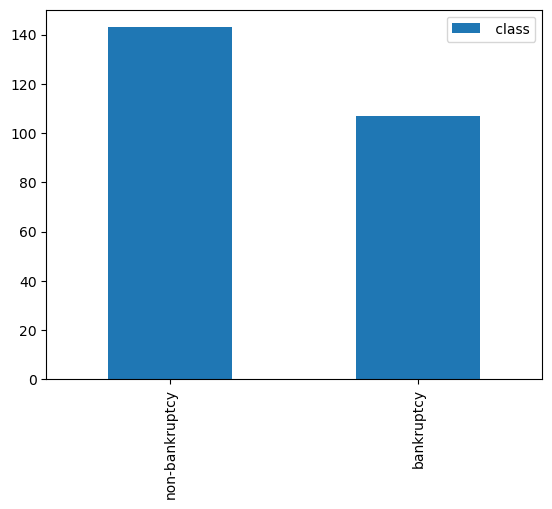

In [8]:

df[' class'].value_counts().plot.bar()
plt.legend()

# Pie Chart

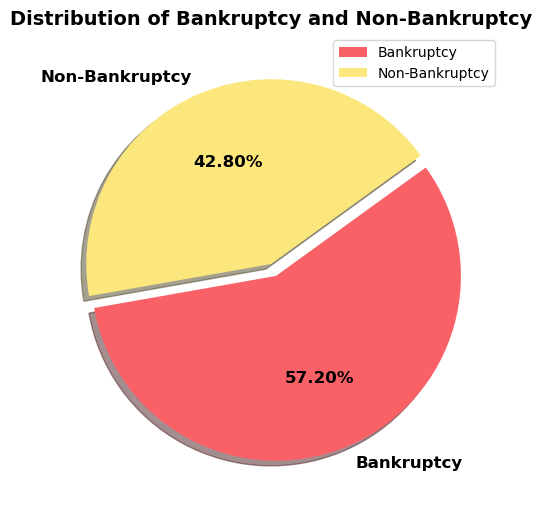

In [9]:
class_counts = df[' class'].value_counts()
labels = ['Bankruptcy', 'Non-Bankruptcy']
colors = ['#F96167', '#FCE77D']
explode = (0.07, 0.0)
autopct_format = '%.2f%%'

# Figure and axis setup
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(class_counts, 
       labels=labels, 
       explode=explode, 
       autopct=autopct_format, 
       colors=colors,
       shadow=True, 
       startangle=190, 
       textprops={'size': 'large', 
                  'fontweight': 'bold', 
                  'rotation': 0, 
                  'color': 'black'})

# Add legend and title
ax.legend(loc='upper right')
ax.set_title("Distribution of Bankruptcy and Non-Bankruptcy", fontsize=14, fontweight='bold')

plt.show()


In [10]:
df.groupby(' class').count()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
class,,,,,,
bankruptcy,107,107,107,107,107,107
non-bankruptcy,143,143,143,143,143,143


In [11]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


# Pairplot

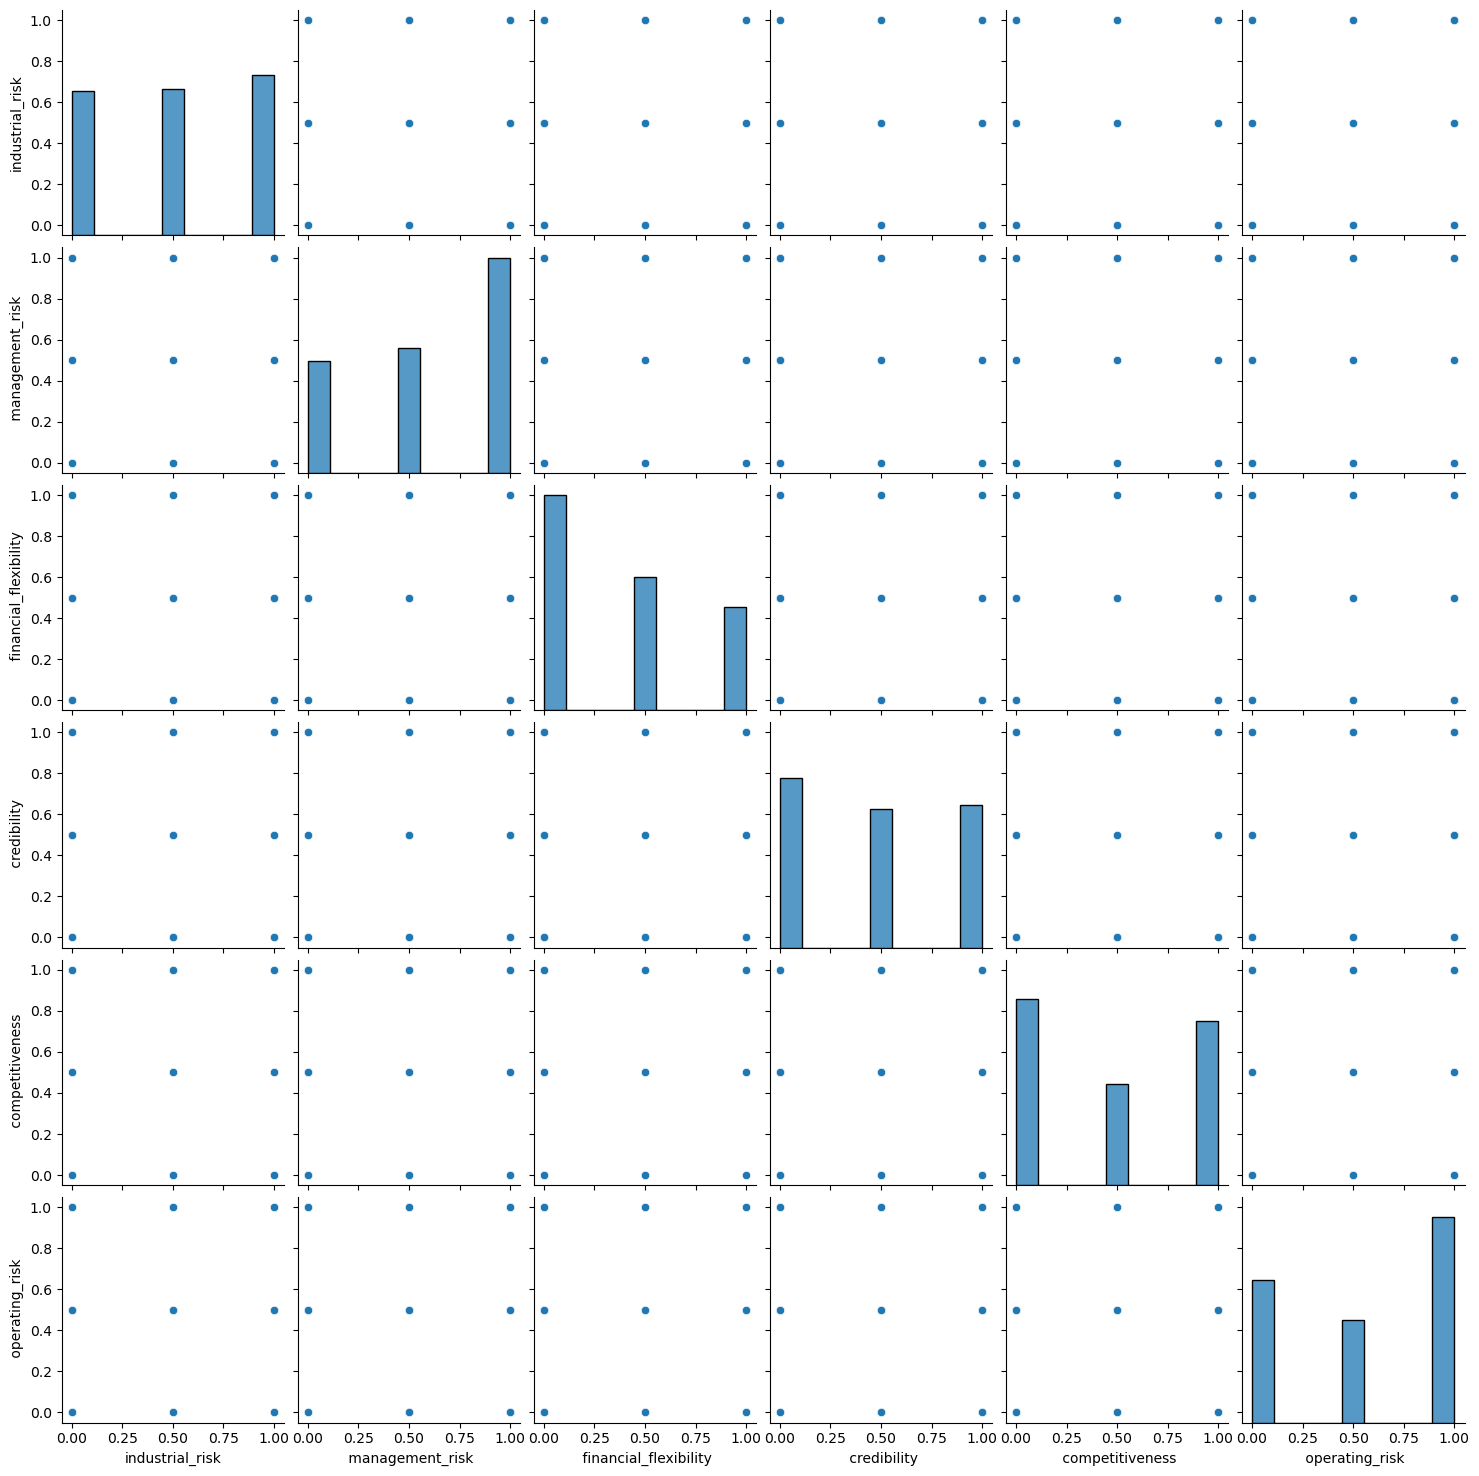

In [12]:
sns.pairplot(df)
plt.show()

# KDE Plot

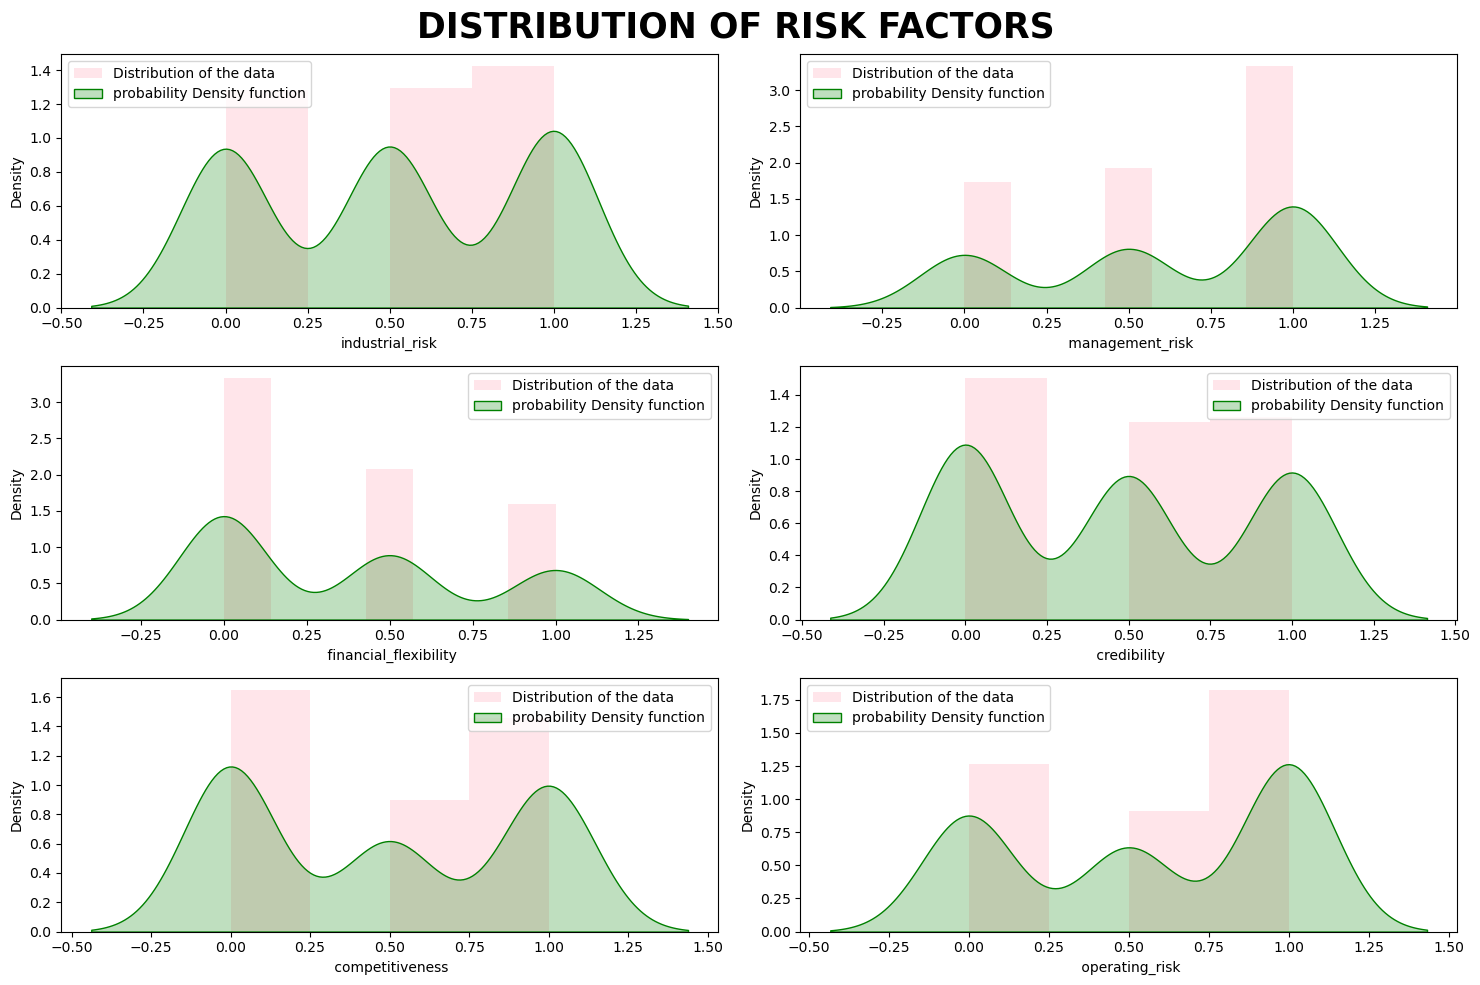

In [13]:
#Distribution plot for each column
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,10)) 
fig.suptitle('DISTRIBUTION OF RISK FACTORS',fontsize=25,fontweight='bold',color='black')
risk_factors=['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk']
for i, factor in enumerate(risk_factors):
    row=i//2 
    col=i%2 
    sns.distplot(df[factor],ax=ax[row,col],kde_kws={'fill':True,'color':'green','label':'probability Density function'},color='pink',label='Distribution of the data')
    ax[row,col].legend() 
plt.tight_layout()

# Count Plot

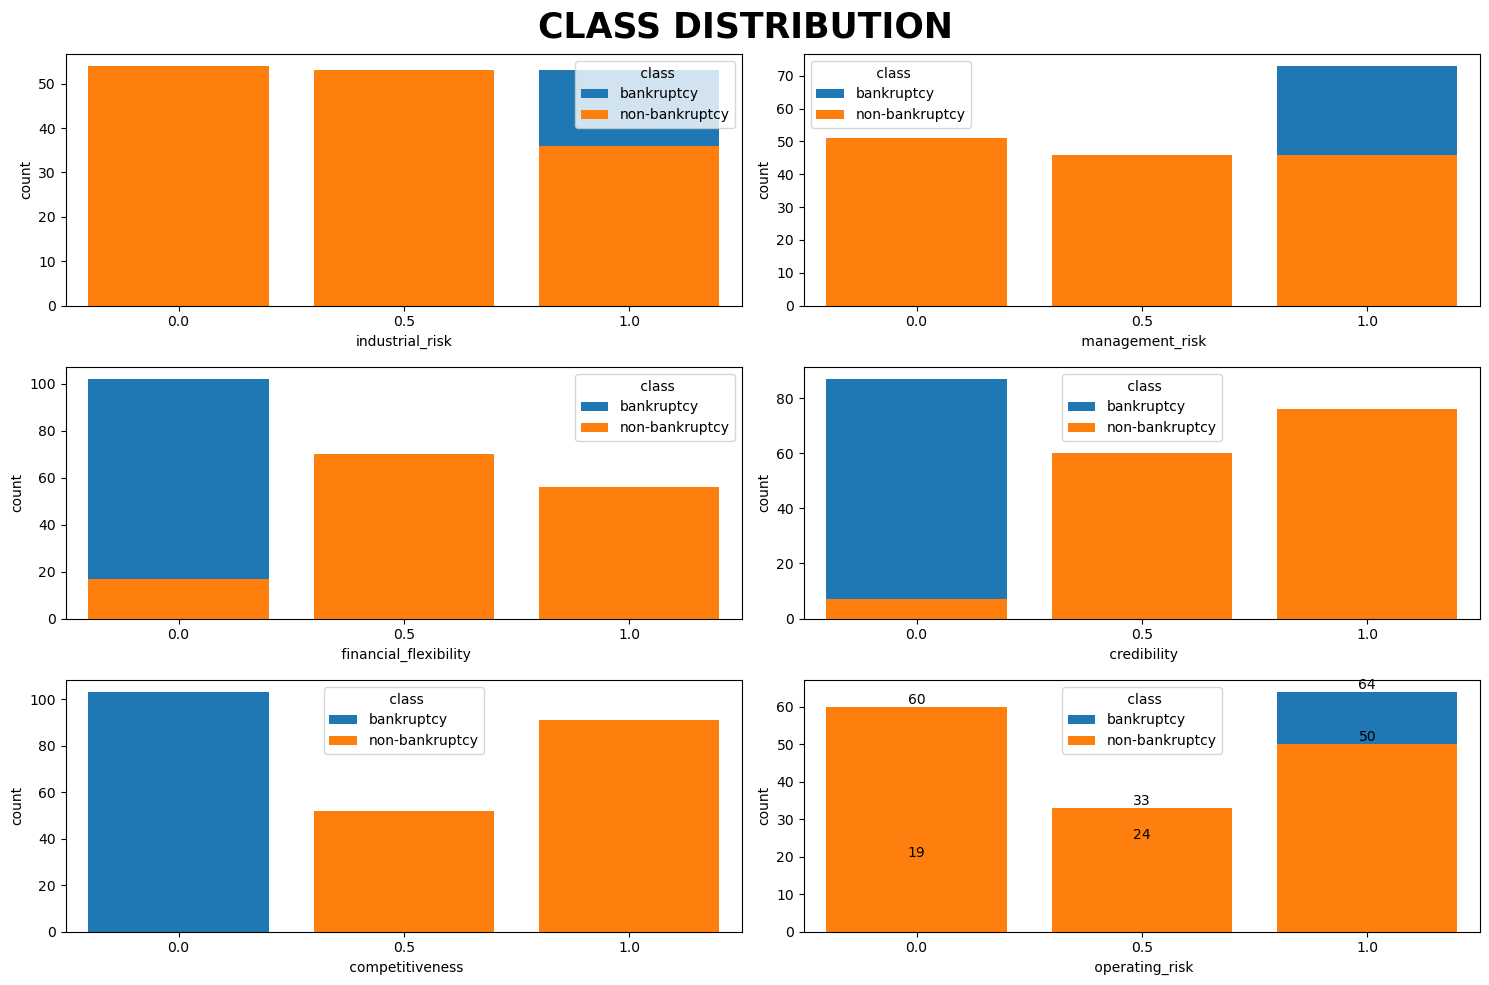

In [22]:
#Individual feature Analysis for class(create countplot) 
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,10))   
fig.suptitle('CLASS DISTRIBUTION',fontsize=25,fontweight='bold',color='black') 
risk_factors=['industrial_risk',' management_risk',' financial_flexibility',' credibility',' competitiveness',' operating_risk']
for i,risk_factors in enumerate(risk_factors):
    row=i//2 
    col=i%2 
    sns.countplot(x=risk_factors,data=df,hue=' class',saturation=1.3,ax=ax[row,col],dodge=False)
for p in ax[row,col].patches:
    ax[row,col].text(p.get_x()+p.get_width()/2,p.get_height(),'%d'%int(p.get_height()),ha='center',va='bottom')
plt.tight_layout()

In [23]:
df.skew()

industrial_risk          -0.067011
 management_risk         -0.444701
 financial_flexibility    0.479134
 credibility              0.112955
 competitiveness          0.093906
 operating_risk          -0.275547
dtype: float64

# Box plot

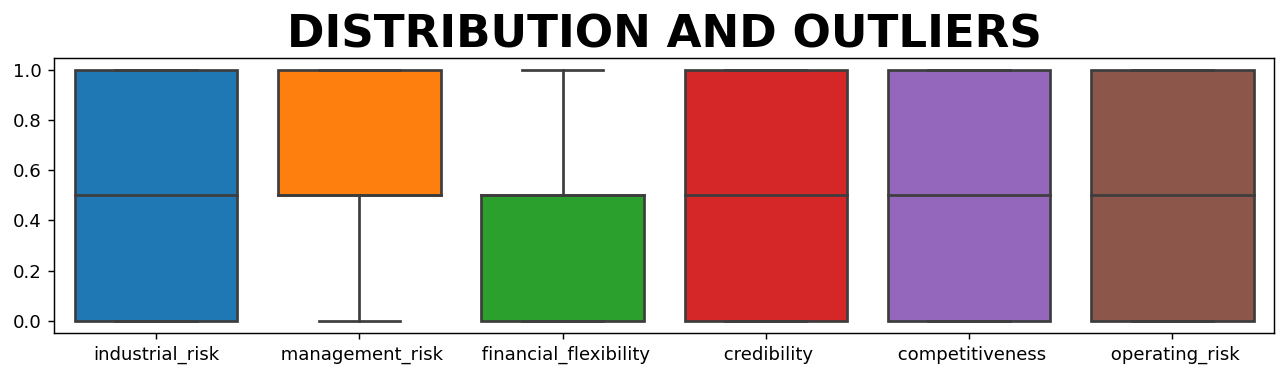

In [24]:
fig,ax=plt.subplots(figsize=(10,3),dpi=130) 
sns.boxplot(data=df,saturation=1.3,ax=ax)
ax.set_title('DISTRIBUTION AND OUTLIERS',fontsize=25,fontweight='bold',color='black') 
plt.tight_layout()

# Risk Factor

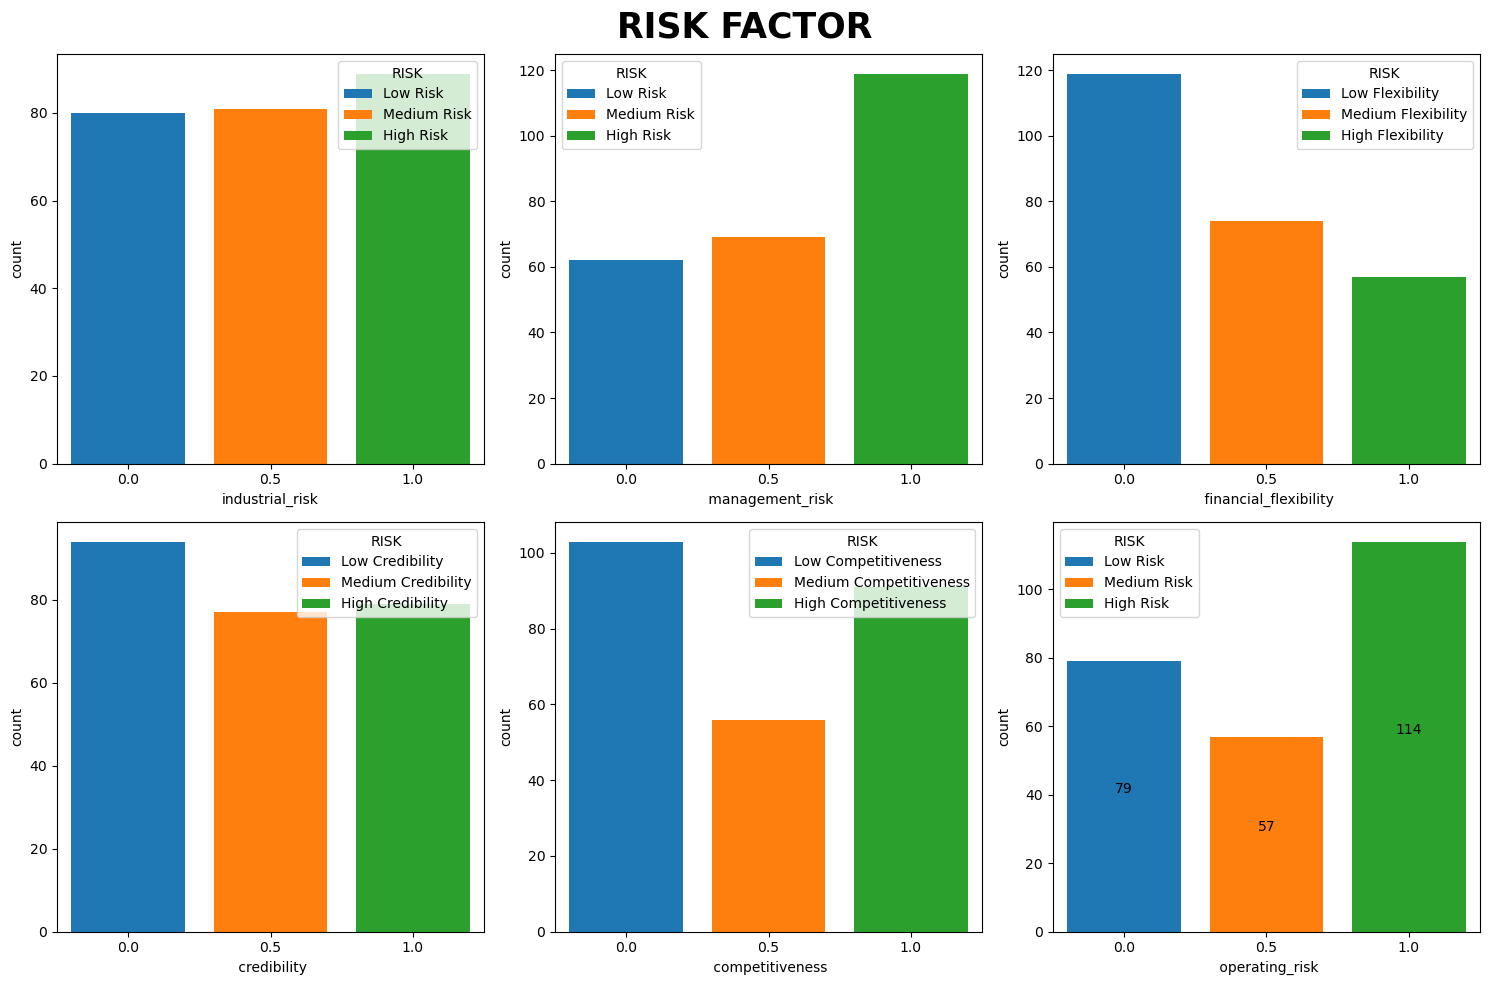

In [25]:
fig,ax=plt.subplots(2,3,figsize=(15,10))  
fig.suptitle('RISK FACTOR',fontsize=25,fontweight='bold',color='black') 

features=['industrial_risk',' management_risk',' financial_flexibility',' credibility',' competitiveness',' operating_risk']
risk_labels = [['Low Risk', 'Medium Risk', 'High Risk'],
               ['Low Risk', 'Medium Risk', 'High Risk'],
               ['Low Flexibility', 'Medium Flexibility', 'High Flexibility'],
               ['Low Credibility', 'Medium Credibility', 'High Credibility'],
               ['Low Competitiveness', 'Medium Competitiveness', 'High Competitiveness'],
               ['Low Risk', 'Medium Risk', 'High Risk']]
for i, features in enumerate(features):
    row=i//3
    col=i%3
    sns.countplot(x=features,data=df,hue=features,saturation=1.3,ax=ax[row,col],dodge=False)
    ax[row,col].legend(title='RISK',labels=risk_labels[i])
for p in ax[row,col].patches:
    if not p.get_height()== p.get_height():
        height=0 
    else:
        height=p.get_height()
        ax[row,col].text(p.get_x()+p.get_width()/2,height/2,int(height),ha='center',va='bottom') 
plt.tight_layout()

# Correlation Heatmap

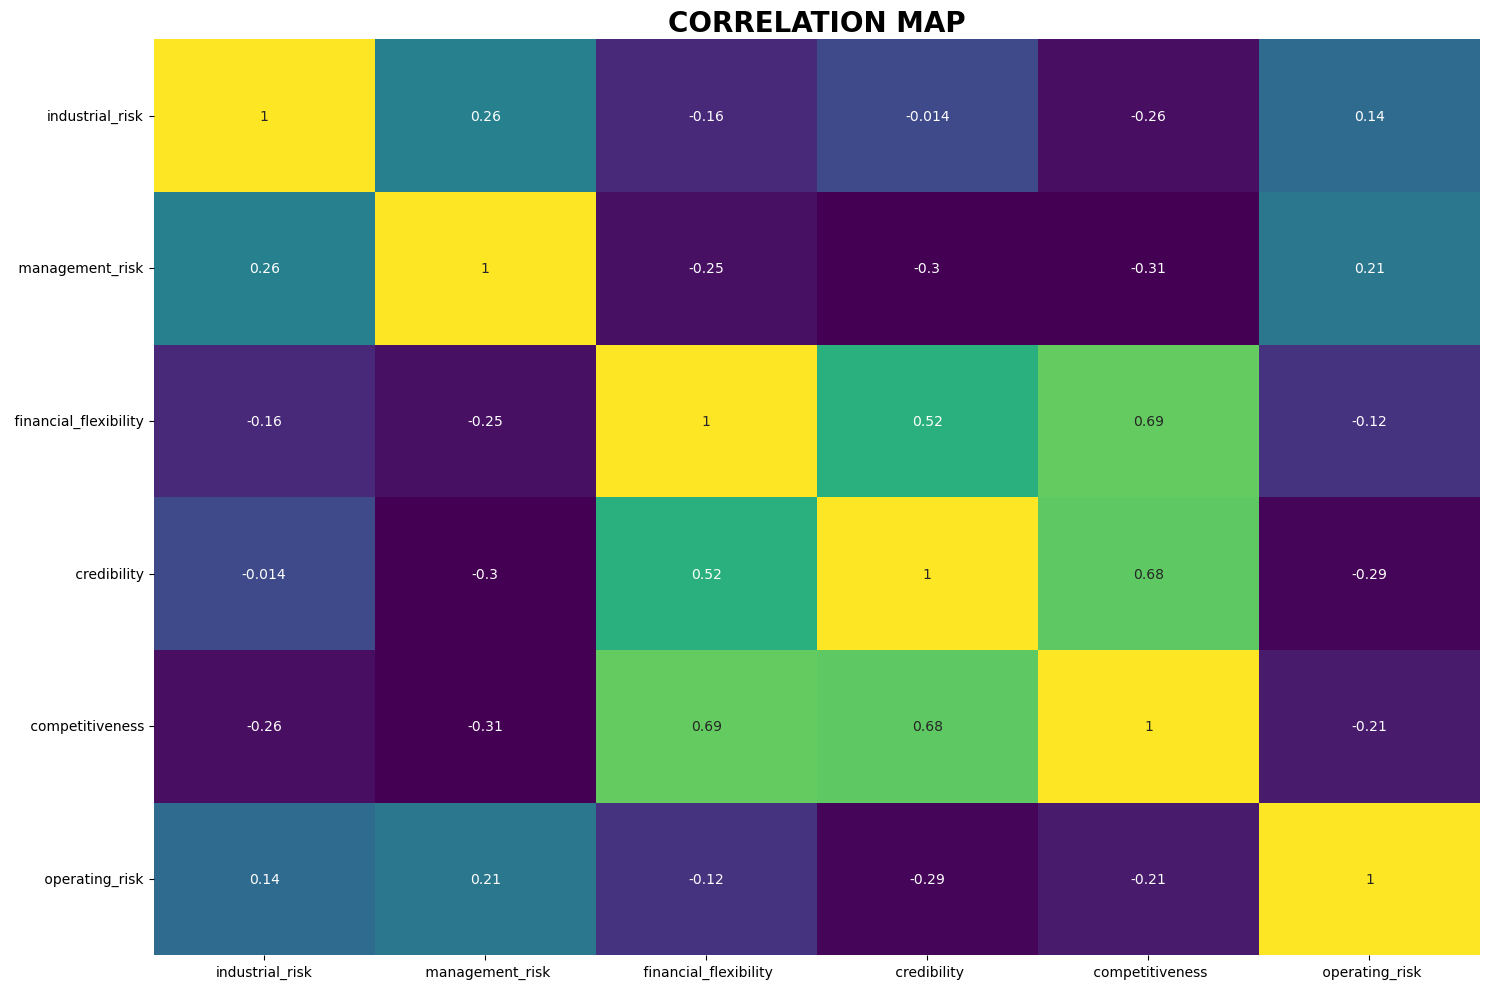

In [26]:
#Correlation between the features 
plt.figure(figsize=(15,10)) 
sns.heatmap(df.corr(), annot=True, cmap='viridis', cbar=False)
plt.title('CORRELATION MAP', color='black', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', colors='black')
plt.tight_layout()

In [27]:
import sweetviz as sv 
sweet_report = sv.analyze(df)
sweet_report.show_html('weather_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [28]:
from sklearn.model_selection import train_test_split # trian and test
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.metrics import classification_report

In [29]:
df1 = df.iloc[:,:]
df1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [30]:
df1["class_yn"] = 1
df1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [31]:
df1.loc[df[' class'] == 'bankruptcy', 'class_yn'] = 0
df1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [32]:
df1.drop(' class', inplace = True, axis =1)
df1.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


In [33]:
df1.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class_yn'],
      dtype='object')

In [34]:
df['class_yn']

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class_yn, Length: 250, dtype: int64

In [35]:
df1['class_yn'].value_counts()

1    143
0    107
Name: class_yn, dtype: int64

In [36]:
features=df1.drop('class_yn',axis=1)
features.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0


In [37]:
target=df1[['class_yn']]
target.head()

,class_yn
0,0
1,0
2,0
3,0
4,0


In [38]:
# Spliting dataset into X and y

In [39]:
# Input
x = df1.iloc[:,:-1]

# Target variable

y = df1.iloc[:,-1]

In [40]:
from sklearn.model_selection import train_test_split # trian and test
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

# Model Building

In [42]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

# 1.Logistic Regression

Logistic Regression on Training Dataset

In [43]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train, y_train)
y_pred = LR_model.predict(x_test)
acc1 = accuracy_score(y_test, y_pred)

In [44]:
# Train Score
train_score = LR_model.score(x_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9947


Logistic Regression on Testing Dataset

In [45]:
# Test score
f1_LR = f1_score(y_test, y_pred)
precision_LR = precision_score(y_test, y_pred)
recall_LR = recall_score(y_test, y_pred)
Accuracy_LR=accuracy_score(y_test, y_pred)
print('Recall score: %0.4f'% recall_LR)
print('Precision score: %0.4f'% precision_LR)
print('F1-Score: %0.4f'% f1_LR)
print('Accuracy score: %0.4f'% Accuracy_LR)

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


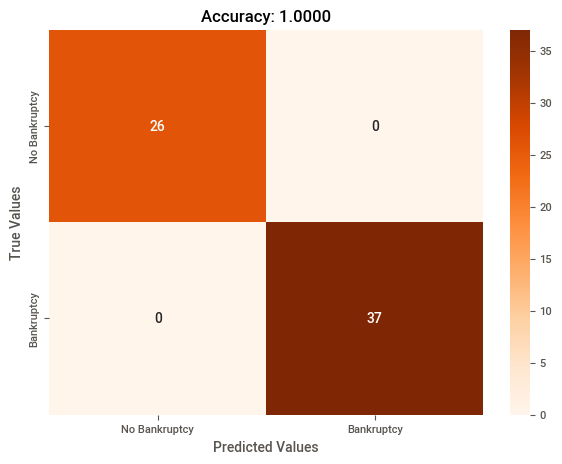



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [46]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

# 2.KNN

KNN Model on Training dataset

In [47]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)
acc3 = accuracy_score(y_test, y_pred)

In [48]:
# Train Score
train_score = KNN_model.score(x_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9893


KNN on Testing dataset

In [49]:
# Test score
f1_KNN = f1_score(y_test, y_pred)
precision_KNN = precision_score(y_test, y_pred)
recall_KNN = recall_score(y_test, y_pred)
Accuracy_KNN=accuracy_score(y_test, y_pred)
print('Recall score: %0.4f'% recall_KNN)
print('Precision score: %0.4f'% precision_KNN)
print('F1-Score: %0.4f'% f1_KNN)
print('Accuracy score: %0.4f'% Accuracy_KNN)

Recall score: 0.9730
Precision score: 1.0000
F1-Score: 0.9863
Accuracy score: 0.9841


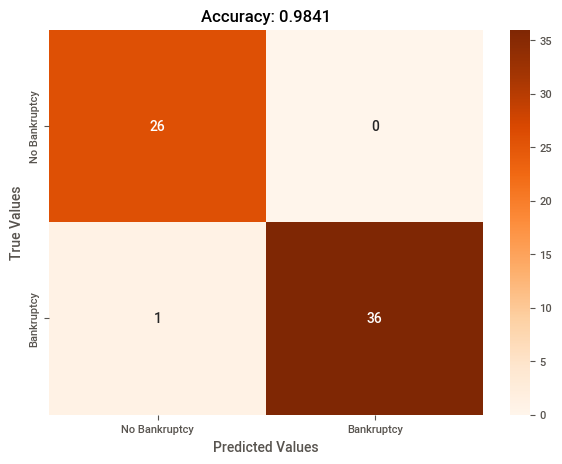



Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



In [50]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

# 3.Naive Bayes

Naive Bayes on training dataset

In [51]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
y_pred = NB_model.predict(x_test)
acc2 = accuracy_score(y_test, y_pred)

In [52]:
# Train Score
train_score = NB_model.score(x_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9733


Naive Bayes on testing dataset

In [53]:
# Test score
f1_NB = f1_score(y_test, y_pred)
precision_NB = precision_score(y_test, y_pred)
recall_NB = recall_score(y_test, y_pred)
Accuracy_NB=accuracy_score(y_test, y_pred)
print('Recall score: %0.4f'% recall_NB)
print('Precision score: %0.4f'% precision_NB)
print('F1-Score: %0.4f'% f1_NB)
print('Accuracy score: %0.4f'% Accuracy_NB)

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


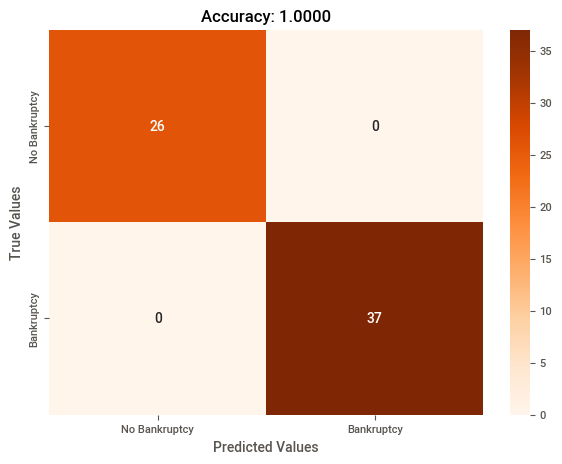



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [54]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

# 4.Decision Tree Classifier

DTC on Training dataset

In [55]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(x_train, y_train)
y_pred = DTR_model.predict(x_test)
acc4 = accuracy_score(y_test, y_pred)

In [56]:
# Train Score
train_score = DTR_model.score(x_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


# Testing Decision Tree Classification on the Testing set

In [57]:
# Test score
f1_DT = f1_score(y_test, y_pred)
precision_DT = precision_score(y_test, y_pred)
recall_DT = recall_score(y_test, y_pred)
Accuracy_DT=accuracy_score(y_test, y_pred)
print('Recall score: %0.4f'% recall_DT)
print('Precision score: %0.4f'% precision_DT)
print('F1-Score: %0.4f'% f1_DT)
print('Accuracy score: %0.4f'% Accuracy_DT)

Recall score: 0.9730
Precision score: 1.0000
F1-Score: 0.9863
Accuracy score: 0.9841


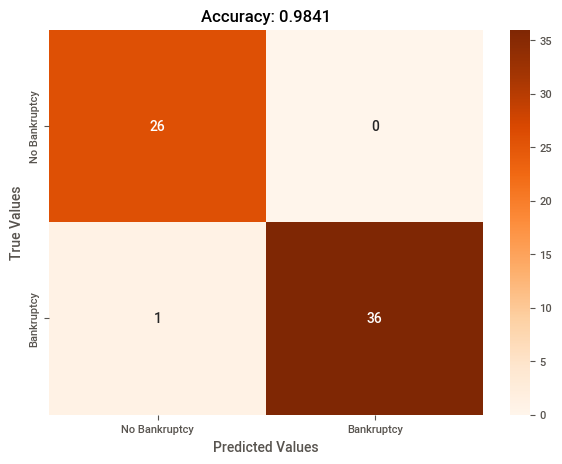



Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



In [58]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

# 5.Random Forest Classifier

Random Forest Classification model on training dataset

In [59]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)
acc5 = accuracy_score(y_test, y_pred)

In [60]:
# Train Score
train_score = RF_model.score(x_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


Random Forest Classification model on testing dataset

In [61]:
# Test score
f1_RF = f1_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred)
recall_RF = recall_score(y_test, y_pred)
Accuracy_RF=accuracy_score(y_test, y_pred)
print('Recall score: %0.4f'% recall_RF)
print('Precision score: %0.4f'% precision_RF)
print('F1-Score: %0.4f'% f1_RF)
print('Accuracy score: %0.4f'% Accuracy_RF)

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


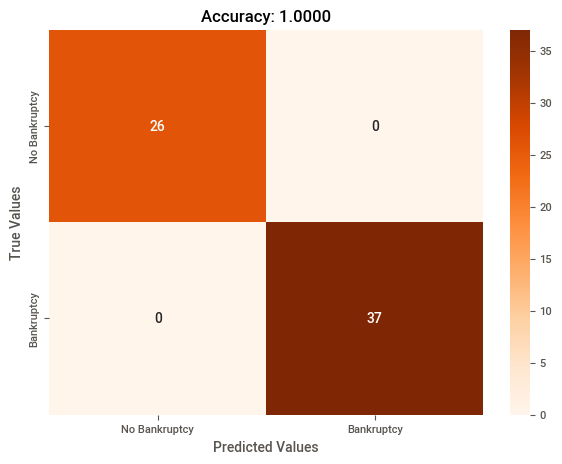



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [62]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

# 6.SVM

SVM on training dataset

In [63]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model.fit(x_train, y_train)
y_pred = SVM_model.predict(x_test)
acc6 = accuracy_score(y_test, y_pred)

In [64]:
# Train Score
train_score = SVM_model.score(x_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9947


SVM on testing dataset

In [65]:
# Test score
f1_SVM = f1_score(y_test, y_pred)
precision_SVM = precision_score(y_test, y_pred)
recall_SVM = recall_score(y_test, y_pred)
Accuracy_SVM=accuracy_score(y_test, y_pred)
print('Recall score: %0.4f'% recall_SVM)
print('Precision score: %0.4f'% precision_SVM)
print('F1-Score: %0.4f'% f1_SVM)
print('Accuracy score: %0.4f'% Accuracy_SVM)

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


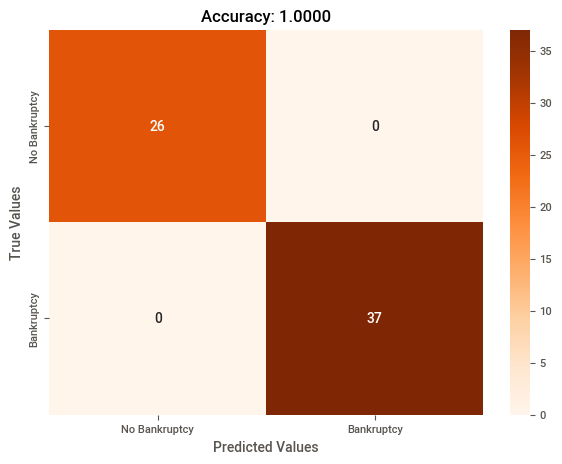



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [66]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

# 7.XGBoost

XGBoost on training dataset

In [67]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(x_train, y_train)
y_pred = XGB_model.predict(x_test)
acc7 = accuracy_score(y_test, y_pred)

In [68]:
# Train Score
train_score = XGB_model.score(x_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


XGBoost on testing dataset

In [69]:
# Test score
f1_XGB = f1_score(y_test, y_pred)
precision_XGB = precision_score(y_test, y_pred)
recall_XGB = recall_score(y_test, y_pred)
Accuracy_XGB=accuracy_score(y_test, y_pred)
print('Recall score: %0.4f'% recall_XGB)
print('Precision score: %0.4f'% precision_XGB)
print('F1-Score: %0.4f'% f1_XGB)
print('Accuracy score: %0.4f'% Accuracy_XGB)

Recall score: 0.9730
Precision score: 1.0000
F1-Score: 0.9863
Accuracy score: 0.9841


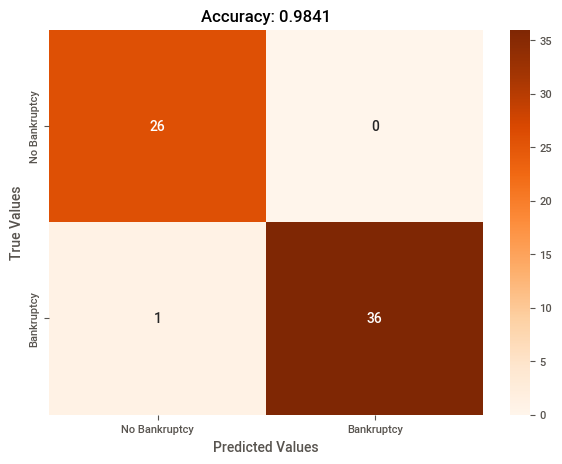



Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



In [70]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

# 8.ANN

In [71]:
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
ANN_model =keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_dim=6),  # Update input_dim to match your number of features
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
]) 

ANN_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

In [73]:
ANN_model.fit(x_train, y_train, epochs=50)

Epoch 1/50
6/6 [==============================] - 3s 16ms/step - loss: 0.6803 - accuracy: 0.6203
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.6232 - accuracy: 0.9412
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 0.5743 - accuracy: 0.9358
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 0.5270 - accuracy: 0.9412
Epoch 5/50
6/6 [==============================] - 0s 5ms/step - loss: 0.4787 - accuracy: 0.9733
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 0.4254 - accuracy: 0.9733
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3705 - accuracy: 0.9733
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.9947
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 0.2663 - accuracy: 0.9893
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 0.2218 - accuracy: 0.9893
Epoch 11/50
6/6 [=====================

# Prediction

In [74]:
def predict(model,x):
    pred  = ANN_model.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,5))
#     cmap = sns.color_palette("viridis", as_cmap=True)
    sns.heatmap(cm,annot=True,fmt='g',cmap='Oranges',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_true,y_pred))

Train Prediction

6/6 [==============================] - 0s 3ms/step


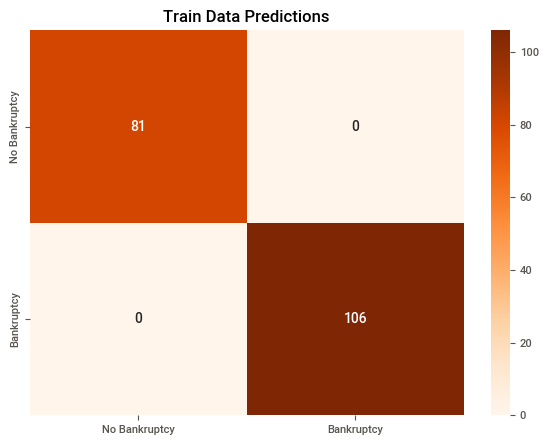



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00       106

    accuracy                           1.00       187
   macro avg       1.00      1.00      1.00       187
weighted avg       1.00      1.00      1.00       187



In [75]:
y_train_pred = predict(ANN_model, x_train)
predict_graph(y_train, y_train_pred, 'Train Data Predictions')

Test Prediction

In [76]:
y_pred = predict(ANN_model, x_test)
acc9 = accuracy_score(y_test, y_pred)

2/2 [==============================] - 0s 4ms/step


In [77]:
# Test score
f1_ANN = f1_score(y_test, y_pred)
precision_ANN = precision_score(y_test, y_pred)
recall_ANN = recall_score(y_test, y_pred)
Accuracy_ANN=accuracy_score(y_test, y_pred)
print('Recall score: %0.4f'% recall_ANN)
print('Precision score: %0.4f'% precision_ANN)
print('F1-Score: %0.4f'% f1_ANN)
print('Accuracy score: %0.4f'% Accuracy_ANN)

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


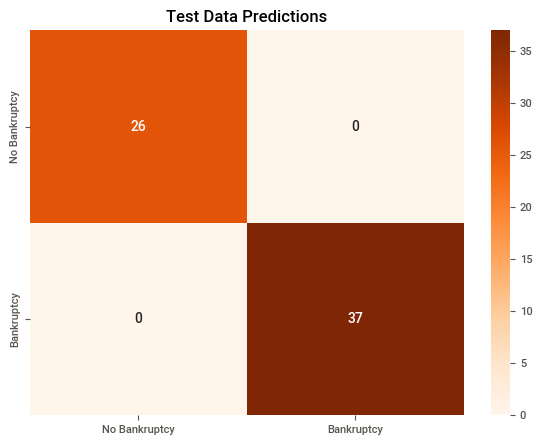



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [78]:
predict_graph(y_test, y_pred, 'Test Data Predictions')

# Result

Compare the accuracy of the models on the training set

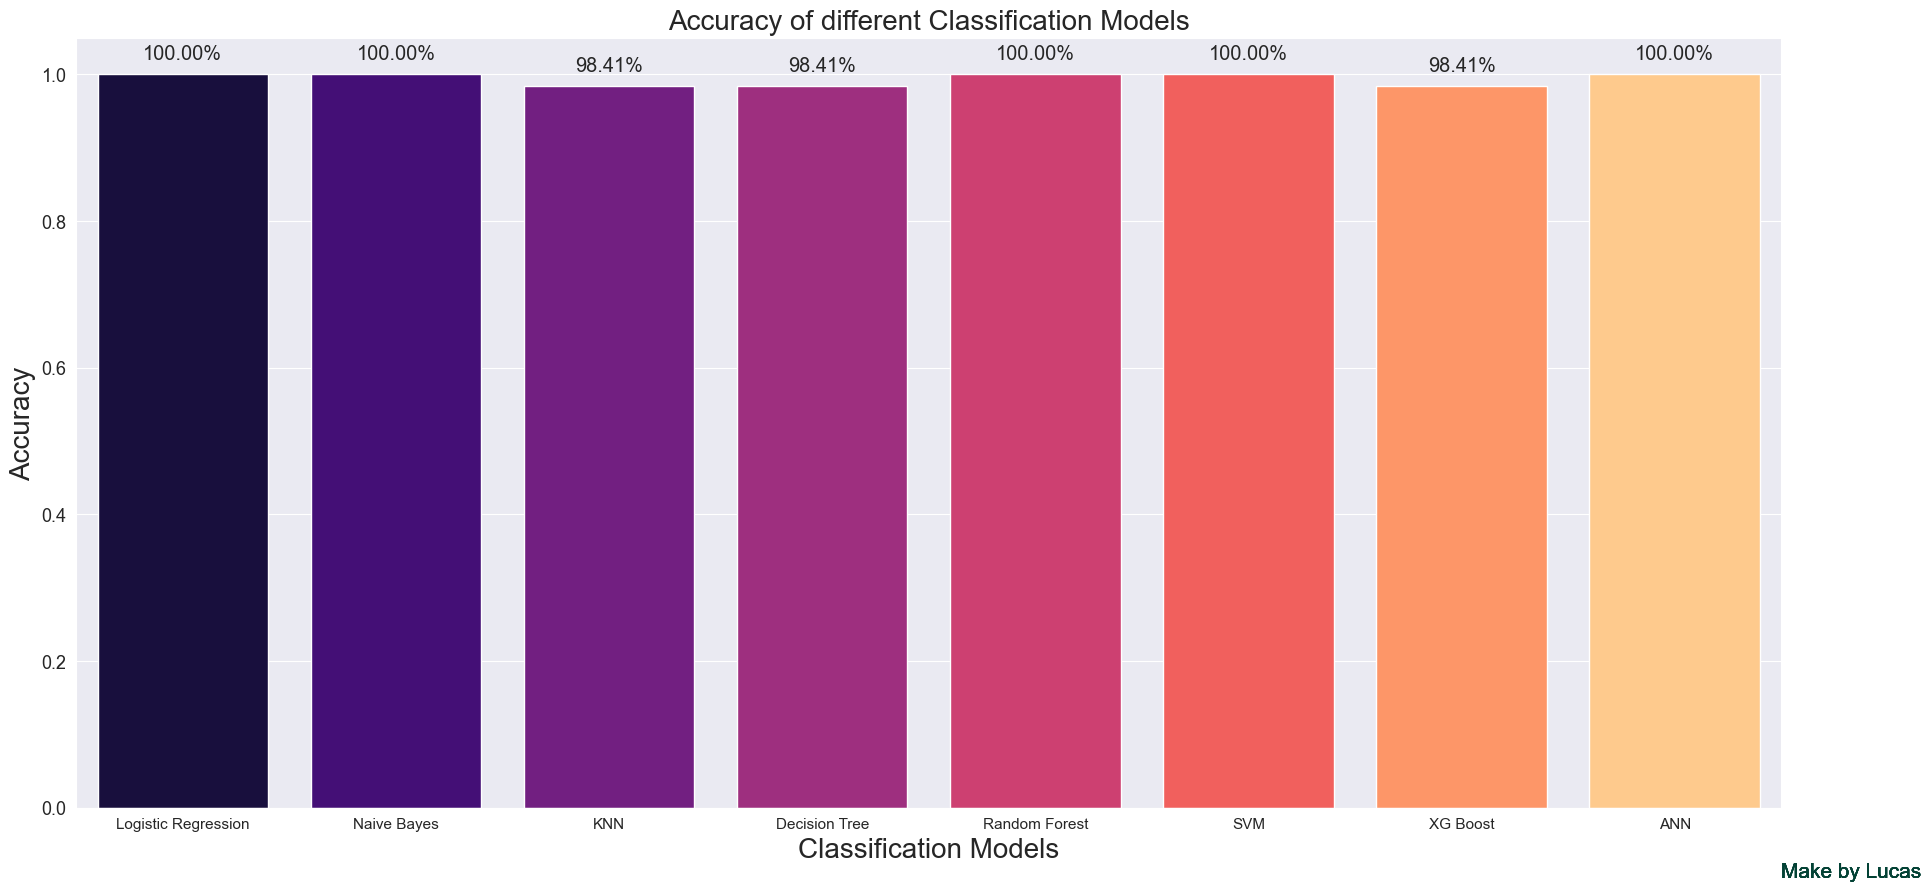

In [79]:
mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Decision Tree")
mylist.append(acc5)
mylist2.append("Random Forest")
mylist.append(acc6)
mylist2.append("SVM")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc9)
mylist2.append("ANN")

plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "magma", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();

ROC Curve and Area Under the Curve

In [80]:
from sklearn.metrics import roc_curve, auc

Logisic Regression - ROC

In [81]:
y_pred_logistic = LR_model.predict_proba(x_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

KNN -ROC

In [82]:
y_pred_knn = KNN_model.predict_proba(x_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

Naive Bayes - ROC

In [83]:
y_pred_nb = NB_model.predict_proba(x_test)[:,1]
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

Decision Tree Classifier - ROC

In [84]:
y_pred_dtr = DTR_model.predict_proba(x_test)[:,1]
dtr_fpr, dtr_tpr, threshold = roc_curve(y_test, y_pred_dtr)
auc_dtr = auc(dtr_fpr, dtr_tpr)

Random Forest -ROC

In [85]:
y_pred_rfc = RF_model.predict_proba(x_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

SVM - ROC

In [86]:
y_pred_svm = SVM_model.predict_proba(x_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

XGBoost - ROC

In [87]:
y_pred_xgb = XGB_model.predict_proba(x_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

ANN - ROC

In [88]:
y_pred_ann = ANN_model.predict(x_test)
ann_fpr, ann_tpr, threshold = roc_curve(y_test, y_pred_ann)
auc_ann = auc(ann_fpr, ann_tpr)

2/2 [==============================] - 0s 5ms/step


# ROC plotting Graph

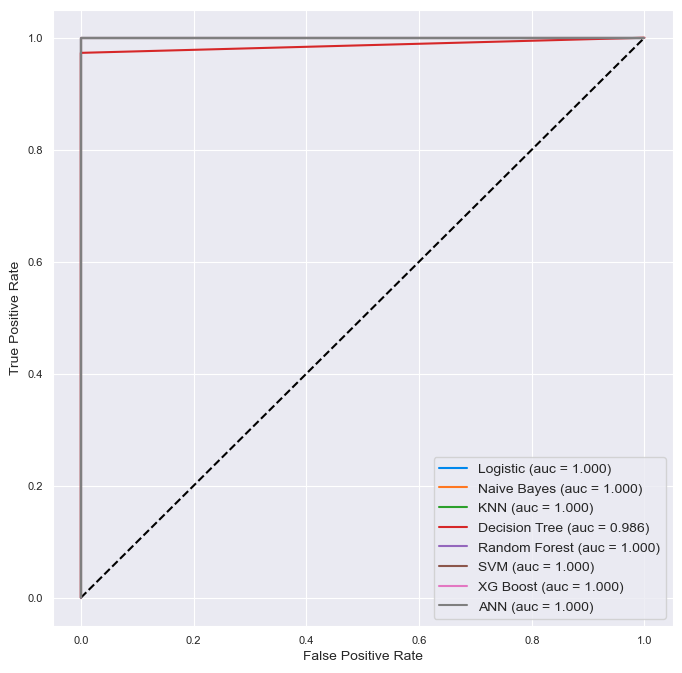

In [89]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.3f)' % auc_logistic)
# Naive Bayes
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (auc = %0.3f)' % auc_nb)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.3f)' % auc_knn)
# Decision Tree
plt.plot(dtr_fpr, dtr_tpr, label='Decision Tree (auc = %0.3f)' % auc_dtr)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.3f)' % auc_rfc)
# SVM
plt.plot(svm_fpr, svm_tpr, label='SVM (auc = %0.3f)' % auc_svm)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.3f)' % auc_xgb)
# ANN
plt.plot(ann_fpr, ann_tpr, label='ANN (auc = %0.3f)' % auc_ann)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [90]:
# Storing results in a data frame

d1 = {'Models':['Logistic Regression','Naive Bayes','KNN','Decision Tree','Random Forest',
                'SVM','XG Boost','ANN'], 
      'Accuracy':[Accuracy_LR, Accuracy_NB, Accuracy_KNN, Accuracy_DT, Accuracy_RF, Accuracy_SVM, Accuracy_XGB, Accuracy_ANN],
     'F1_Score':[f1_LR, f1_NB, f1_KNN, f1_DT, f1_RF, f1_SVM, f1_XGB, f1_ANN],
     'Precision':[precision_LR, precision_NB, precision_KNN, precision_DT, precision_RF, precision_SVM, precision_XGB, 
                  precision_ANN],
     'Recall':[recall_LR, recall_NB, recall_KNN, recall_DT, recall_RF, recall_SVM, recall_XGB, recall_ANN]}
results_df = pd.DataFrame(d1)
results_df.sort_values(by=['Accuracy'], ascending=False)

,Models,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,1.000000,1.000000,1.0,1.000000
1,Naive Bayes,1.000000,1.000000,1.0,1.000000
4,Random Forest,1.000000,1.000000,1.0,1.000000
5,SVM,1.000000,1.000000,1.0,1.000000
7,ANN,1.000000,1.000000,1.0,1.000000
2,KNN,0.984127,0.986301,1.0,0.972973
3,Decision Tree,0.984127,0.986301,1.0,0.972973
6,XG Boost,0.984127,0.986301,1.0,0.972973


In [91]:
import pickle
pickle_out = open("LR_model.pkl","wb")
pickle.dump(SVM_model, pickle_out)
pickle_out.close()

# ML Pipelines

In [92]:
# Create a pipeline that standardizes the data then creates a model
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# load data
data = df1
data['class_yn'] = data['class_yn'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class_yn'] = label_encoder.fit_transform(data['class_yn'])
array = data.values
X = array[:,0:6]
Y = array[:,6]


# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('log', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9960000000000001


In [93]:
# Create a pipeline that extracts features from the data then creates a model
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
data = df1
data['class_yn'] = data['class_yn'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class_yn'] = label_encoder.fit_transform(data['class_yn'])
array = data.values
X = array[:,0:6]
Y = array[:,6]

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(max_iter=300)))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9960000000000001


In [102]:
# Save Model Using Pickle and load and predict
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

data = df1
data['class_yn'] = data['class_yn'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class_yn'] = label_encoder.fit_transform(data['class_yn'])
array = data.values
X = array[:,0:6]
Y = array[:,6]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# save the model to disk
data = 'finalized_model.sav'
dump(model, open('data', 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open('data', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

1.0


In [95]:
y_pred = model.predict(X_train)
y_pred

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.])

In [96]:
y_pred_test=model.predict(X_test)
y_pred_test

array([1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.])

In [97]:
pd.crosstab(y_pred,Y_train)

col_0,0.0,1.0
row_0,,
0.0,64,0
1.0,1,102


In [98]:
pd.crosstab(y_pred_test,Y_test)

col_0,0.0,1.0
row_0,,
0.0,42,0
1.0,0,41


In [99]:
import numpy as np
import pickle
import pandas as pd
import streamlit as st

from PIL import Image

pickle_in = open("LR_model.pkl","rb")
classifier=pickle.load(pickle_in)

def welcome():
    return "Welcome ALL"
def predict_bankruptcy(industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk):
     prediction=classifier.predict([[industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk]])
     print(prediction)
     return prediction





def main():
    st.title("Bankruptcy Prevention")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;"> Bankruptcy Prevention App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    industrial_risk = st.text_input("industrial_risk","  ")
    management_risk = st.text_input("management_risk","  ")
    financial_flexibility = st.text_input("financial_flexibility","  ")
    credibility = st.text_input("credibility","  ")
    competitiveness = st.text_input("competitiveness","  ")
    operating_risk = st.text_input("operating_risk","  ")
    result=""
    if st.button("Predict"):
        result=predict_bankruptcy(industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk)
        if result==0:    
            st.success("Company is Non-Bankrupt")
        else:
            st.success("Company is Bankrupt")
    if st.button("About"):
        st.text("Built with Streamlit")

if __name__=='__main__':
    main()

2023-11-24 19:51:17.917 
  command:

    streamlit run C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
